# Installing specfied Libraries

In [ ]:
pip install xgboost

In [2]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [3]:
train=pd.read_csv("../input/traindata/train_0OECtn8.csv")
test=pd.read_csv("../input/testdata/test_1zqHu22.csv")
train.shape, test.shape

((89197, 10), (11121, 9))

In [4]:
train

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...,...
89192,89193,23996,15,32,25,Male,Other,340,662,3.91
89193,89194,20466,20,47,31,Male,Other,240,892,3.56
89194,89195,13655,16,97,25,Male,Student,270,462,4.23
89195,89196,24840,9,18,35,Male,Working Professional,230,819,3.77


# EDA ON DATA

## Data type and Null values

In [5]:
train.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [6]:
train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [7]:
train["user_id"].value_counts()

5198     10
13218    10
1448     10
13410    10
7157     10
         ..
21507     2
4404      2
21430     2
17541     2
11279     2
Name: user_id, Length: 27734, dtype: int64

In [ ]:
#train['user_id'].value_counts().plot(kind='bar');

In [8]:
train["category_id"].value_counts()

5     8104
8     6313
25    4880
19    4679
21    4043
12    3889
11    3766
4     3678
34    3297
16    3264
13    2777
32    2712
23    2671
18    2241
42    2178
15    2164
9     1886
7     1885
31    1855
3     1845
1     1810
6     1399
39    1339
28    1309
10    1217
17    1208
26    1156
27    1103
36    1025
43    1019
35     986
37     962
29     916
20     702
30     548
41     545
14     536
38     534
24     524
33     517
40     458
22     366
46     236
45     227
44     214
2      167
47      47
Name: category_id, dtype: int64

In [9]:
train["video_id"].value_counts()

112    1337
53     1334
1      1282
65     1103
42     1077
       ... 
165      78
171      78
174      70
166      66
175      47
Name: video_id, Length: 175, dtype: int64

## Engagement_score: the variable we're trying to predict

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


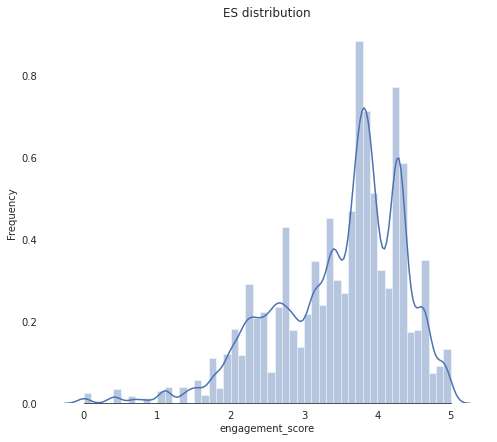

In [10]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['engagement_score'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="engagement_score")
ax.set(title="ES distribution")
sns.despine(trim=True, left=True)
plt.show()

In [11]:
# Skew and kurt
print("Skewness: %f" % train['engagement_score'].skew())
print("Kurtosis: %f" % train['engagement_score'].kurt())

Skewness: -0.855630
Kurtosis: 0.640584


## Converting category data to numerical

In [12]:
print(train['gender'].value_counts())
dummies = pd.get_dummies(train['gender'],drop_first=True)
train_data = pd.concat([train.drop('gender',axis=1),dummies],axis=1)

Male      52397
Female    36800
Name: gender, dtype: int64


In [19]:
train_data.head()    # 1- male ,0 - Female

,user_id,category_id,video_id,age,followers,views,engagement_score,Male,Student,Working Professional
0,19990,37,128,24,180,1000,4.33,1,1,0
1,5304,32,132,14,330,714,1.79,0,1,0
2,1840,12,24,19,180,138,4.35,1,1,0
3,12597,23,112,19,220,613,3.77,1,1,0
4,13626,23,112,27,220,613,3.13,1,0,1


In [13]:
print(train_data['profession'].value_counts())
dummies = pd.get_dummies(train_data['profession'],drop_first=True)
train_data = pd.concat([train_data.drop('profession',axis=1),dummies],axis=1)

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64


In [20]:
train_data.tail()    # 10 -student,01-wp,00-others

,user_id,category_id,video_id,age,followers,views,engagement_score,Male,Student,Working Professional
89192,23996,15,32,25,340,662,3.91,1,0,0
89193,20466,20,47,31,240,892,3.56,1,0,0
89194,13655,16,97,25,270,462,4.23,1,1,0
89195,24840,9,18,35,230,819,3.77,1,0,1
89196,27183,25,150,13,240,317,4.31,1,1,0


<AxesSubplot:xlabel='age', ylabel='Count'>

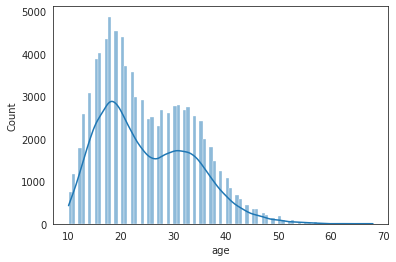

In [21]:
sns.histplot(data = train_data, x = "age", kde = True)

<AxesSubplot:xlabel='followers', ylabel='Count'>

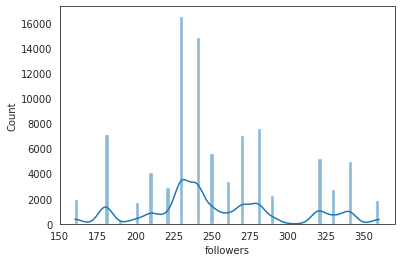

In [22]:
sns.histplot(data = train_data, x = "followers", kde = True)

<AxesSubplot:xlabel='views', ylabel='Count'>

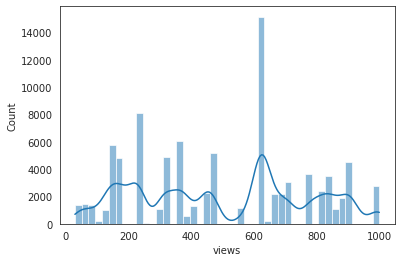

In [23]:
sns.histplot(data = train_data, x = "views", kde = True)

## Dropping unnecessary coloumns

In [14]:
train_data.drop(['row_id'], axis=1, inplace=True)
#test.drop(['row_id','user_id'], axis=1, inplace=True)
train_data.shape, test.shape

((89197, 10), (11121, 9))

In [24]:
train_data.tail()    

,user_id,category_id,video_id,age,followers,views,engagement_score,Male,Student,Working Professional
89192,23996,15,32,25,340,662,3.91,1,0,0
89193,20466,20,47,31,240,892,3.56,1,0,0
89194,13655,16,97,25,270,462,4.23,1,1,0
89195,24840,9,18,35,230,819,3.77,1,0,1
89196,27183,25,150,13,240,317,4.31,1,1,0


In [25]:
test.tail()  

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
11116,100314,26336,25,140,21,Male,Student,240,317
11117,100315,6772,8,100,19,Female,Student,280,628
11118,100316,2042,16,98,22,Male,Student,270,462
11119,100317,24626,8,16,33,Male,Other,280,628
11120,100318,967,8,74,33,Male,Working Professional,280,628


## Correlations

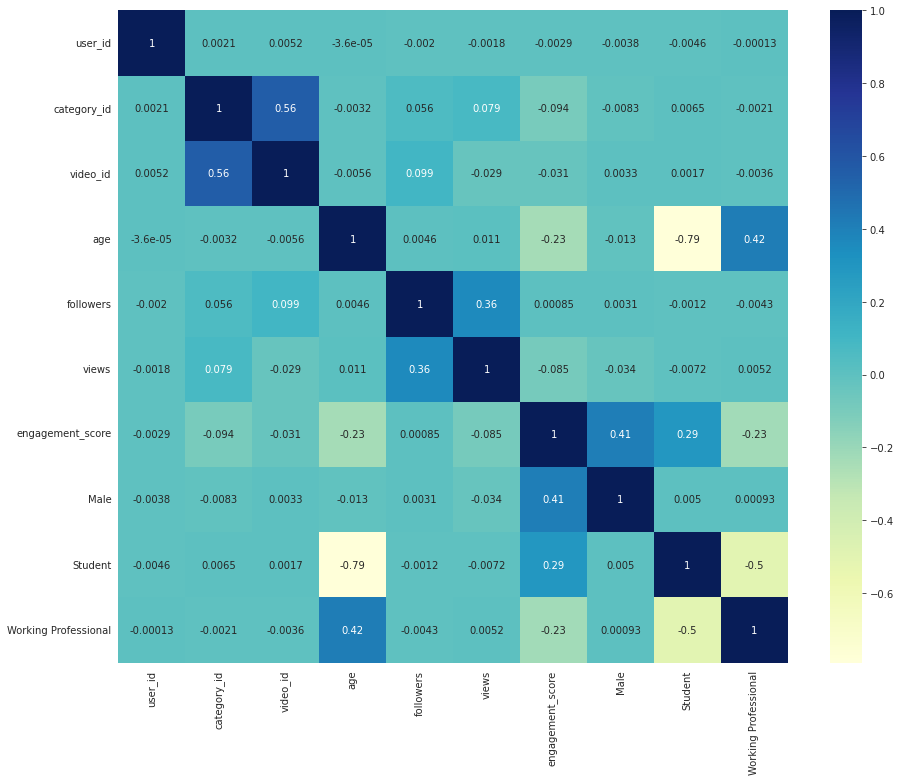

In [15]:
corr = train_data.corr()
plt.subplots(figsize=(15,12))
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True) 
# displaying heatmap
plt.show()

# Training a model

In [26]:
X=train_data.drop(['engagement_score'], axis=1)
y=train_data['engagement_score']

In [27]:
X.head()

,user_id,category_id,video_id,age,followers,views,Male,Student,Working Professional
0,19990,37,128,24,180,1000,1,1,0
1,5304,32,132,14,330,714,0,1,0
2,1840,12,24,19,180,138,1,1,0
3,12597,23,112,19,220,613,1,1,0
4,13626,23,112,27,220,613,1,0,1


In [28]:
y.head()

0    4.33
1    1.79
2    4.35
3    3.77
4    3.13
Name: engagement_score, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (71357, 9)
The size of training output is (71357,)
**************************************************
The size of testing input is (17840, 9)
The size of testing output is (17840,)


# Ridge Regressor

In [31]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [32]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [33]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute error: ",mae(y_train.values, y_train_pred))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  0.7360760525443968
Mean absolute error:  0.5680515208205575
R-squared:  0.27092743621194526


In [34]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute error: ",mae(y_test, y_test_pred))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  0.7386171417905056
Mean absolute error:  0.5687148260816715
R-squared:  0.2778788616815382


# Lasso Regressor

In [35]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [36]:
y_train_pred =lasso_regressor.predict(X_train) ##Predict train result
y_test_pred =lasso_regressor.predict(X_test) ##Predict test result

In [37]:
print("Train Results for lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute error: ",mae(y_train.values, y_train_pred))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  0.7360761844026186
Mean absolute error:  0.5680696484979897
R-squared:  0.2709271750046416


In [38]:
print("Test Results for lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute error: ",mae(y_test, y_test_pred))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  0.7386187907991228
Mean absolute error:  0.5687363668822549
R-squared:  0.27787563731740805


# K Neighbors Regressor

In [39]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [40]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [42]:
print("Train Results for knn Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute error: ",mae(y_train.values, y_train_pred))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for knn Regressor Model:
--------------------------------------------------
Root mean squared error:  0.8227296200178328
Mean absolute error:  0.6558255503048538
R-squared:  0.08916513912834867


In [43]:
print("Test Results for knn Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute error: ",mae(y_test, y_test_pred))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for knn Regressor Model:
--------------------------------------------------
Root mean squared error:  0.8553706077899511
Mean absolute error:  0.6823642338023814
R-squared:  0.0315438999996932


# Decision Tree Regressor

In [44]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [45]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [46]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute error: ", mae(y_train.values, y_train_pred))
print("R-squared: ", r2_score(y_train.values, y_train_pred))


Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.6872357759917682
Mean absolute error:  0.5179687217555204
R-squared:  0.36446876847313847


In [47]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute error: ", mae(y_test, y_test_pred))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.7086241287145016
Mean absolute error:  0.5332242322782851
R-squared:  0.33533445695674513


# RF REGRESSOR

In [48]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [49]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [50]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute error: ", mae(y_train.values, y_train_pred))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.44994705224247666
Mean absolute error:  0.3358858490702489
R-squared:  0.7275742219506862


In [51]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute  error: ", mae(y_test, y_test_pred))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.6745914680459376
Mean absolute  error:  0.5043107231742436
R-squared:  0.3976443597641398


# Checking on test data

In [53]:
test.dtypes

row_id          int64
user_id         int64
category_id     int64
video_id        int64
age             int64
gender         object
profession     object
followers       int64
views           int64
dtype: object

In [54]:
test.isnull().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

In [55]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [56]:
print(test['gender'].value_counts())
dummies = pd.get_dummies(test['gender'],drop_first=True)
test_data = pd.concat([test.drop('gender',axis=1),dummies],axis=1)

Male      6377
Female    4744
Name: gender, dtype: int64


In [57]:
test_data.head()

,row_id,user_id,category_id,video_id,age,profession,followers,views,Male
0,89198,7986,12,42,14,Student,180,138,1
1,89199,11278,34,115,14,Student,230,840,1
2,89200,17245,8,110,44,Working Professional,280,628,0
3,89201,9851,16,137,18,Student,270,462,1
4,89202,16008,34,96,47,Other,230,840,0


In [58]:
print(test_data['profession'].value_counts())
dummies = pd.get_dummies(test_data['profession'],drop_first=True)
test_data = pd.concat([test_data.drop('profession',axis=1),dummies],axis=1)

Student                 5572
Other                   3366
Working Professional    2183
Name: profession, dtype: int64


In [59]:
test_data=test_data.drop(['row_id'],axis=1)

In [60]:
test_data.head()

,user_id,category_id,video_id,age,followers,views,Male,Student,Working Professional
0,7986,12,42,14,180,138,1,1,0
1,11278,34,115,14,230,840,1,1,0
2,17245,8,110,44,280,628,0,0,1
3,9851,16,137,18,270,462,1,1,0
4,16008,34,96,47,230,840,0,0,0


In [61]:
y_test_ridge_pred = ridge_regressor.predict(test_data)
y_test_lasso_pred =lasso_regressor.predict(test_data)
y_test_knn_pred = knn_regressor.predict(test_data)
y_test_dt_pred = tree.predict(test_data)
y_test_rf_pred = random_regressor.predict(test_data)
# y_test_xgb_pred = model_xgb.predict(test_data)

In [ ]:
y_test_pred

In [62]:
test_data['engagement_score_ridge'] = y_test_ridge_pred
test_data['engagement_score_lasso'] = y_test_lasso_pred
test_data['engagement_score_knn'] = y_test_knn_pred
test_data['engagement_score_dt'] = y_test_dt_pred
test_data['engagement_score_rf'] = y_test_rf_pred
# test_data['engagement_score_xgb'] = y_test_xgb_pred

In [63]:
test_data

,user_id,category_id,video_id,age,followers,views,Male,Student,Working Professional,engagement_score_ridge,engagement_score_lasso,engagement_score_knn,engagement_score_dt,engagement_score_rf
0,7986,12,42,14,180,138,1,1,0,4.104768,4.104601,3.401034,4.109443,4.079172
1,11278,34,115,14,230,840,1,1,0,3.839753,3.839578,3.164138,3.831422,3.370679
2,17245,8,110,44,280,628,0,0,1,2.766573,2.766684,3.661034,2.720686,2.592641
3,9851,16,137,18,270,462,1,1,0,4.085669,4.085269,3.630345,4.033378,3.727879
4,16008,34,96,47,230,840,0,0,0,2.738871,2.738313,3.018966,0.000000,1.654284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,240,317,1,1,0,4.037159,4.036608,3.384138,3.957541,3.426137
11117,6772,8,100,19,280,628,0,1,0,3.395434,3.395397,3.753793,3.488652,3.112287
11118,2042,16,98,22,270,462,1,1,0,4.077724,4.077128,3.367241,3.884439,3.490755
11119,24626,8,16,33,280,628,1,0,0,3.667593,3.667342,3.397241,3.730905,3.856555


In [64]:
test=pd.read_csv("../input/testdata/test_1zqHu22.csv")

In [65]:
test

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840
...,...,...,...,...,...,...,...,...,...
11116,100314,26336,25,140,21,Male,Student,240,317
11117,100315,6772,8,100,19,Female,Student,280,628
11118,100316,2042,16,98,22,Male,Student,270,462
11119,100317,24626,8,16,33,Male,Other,280,628


In [66]:
test_data['row_id']=test['row_id']

In [67]:
test_data

,user_id,category_id,video_id,age,followers,views,Male,Student,Working Professional,engagement_score_ridge,engagement_score_lasso,engagement_score_knn,engagement_score_dt,engagement_score_rf,row_id
0,7986,12,42,14,180,138,1,1,0,4.104768,4.104601,3.401034,4.109443,4.079172,89198
1,11278,34,115,14,230,840,1,1,0,3.839753,3.839578,3.164138,3.831422,3.370679,89199
2,17245,8,110,44,280,628,0,0,1,2.766573,2.766684,3.661034,2.720686,2.592641,89200
3,9851,16,137,18,270,462,1,1,0,4.085669,4.085269,3.630345,4.033378,3.727879,89201
4,16008,34,96,47,230,840,0,0,0,2.738871,2.738313,3.018966,0.000000,1.654284,89202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,240,317,1,1,0,4.037159,4.036608,3.384138,3.957541,3.426137,100314
11117,6772,8,100,19,280,628,0,1,0,3.395434,3.395397,3.753793,3.488652,3.112287,100315
11118,2042,16,98,22,270,462,1,1,0,4.077724,4.077128,3.367241,3.884439,3.490755,100316
11119,24626,8,16,33,280,628,1,0,0,3.667593,3.667342,3.397241,3.730905,3.856555,100317


In [68]:
test_data.to_csv("predictions.csv")